In [1]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import randint
import glob
import sys
import os

In [2]:
import plotly.express as px
from plotly.subplots import make_subplots

In [3]:
import sklearn
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
# Cloud authentication.
from google.colab import auth
auth.authenticate_user()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
pathDrive = '/content/drive/MyDrive/mapbiomas/degradacao'
!ls '/content/drive/MyDrive/mapbiomas/degradacao'

'analises amostras SOil.ipynb'			      graficos.ipynb	      tabela_registros.xlsx
 analises_classification_points_S2HarmonicaV2.ipynb  'printShow v4.gslides'
 analises_classification_points_S2HarmonicaV3.ipynb   ROIs


In [7]:
def dividir_coord(row):
    mcoord = row['.geo']
    mcoord = mcoord.replace('{"geodesic":false,"type":"Point","coordinates":[', '')
    mcoord = mcoord.replace(']}', '')
    mcoord = mcoord.split(',')
    row['Latitude'] = mcoord[1]
    row['Longitude'] = mcoord[0]

    return row

In [8]:
def getNumber_year(name_file):
    # "rois_shp_CERRADO_1992_31_manual"
    partes = name_file.split("_")
    numb_year = partes[-3]
    return int(numb_year)


In [9]:
# system:index,class,evi,gv,lai,ndfia,ndwi,osavi,soil,.geo
allfiles = glob.glob(pathDrive + "/ROIs/*.csv")
df_from_each_file = []
# print("allfiles ", allfiles)
region = '31'   # 31,32,33,34,35
region = "_" + region + '_manual'
for cc, namefile in enumerate(allfiles):
    ls_names = namefile.split('/')
    newdf = pd.read_csv(namefile)
    # print("newdf ", newdf.columns)
    # newdf = newdf.apply(dividir_coord, axis= 1)
#         print(newdf[['Longitude', 'Latitude']].head())
    newdf = newdf.drop(['system:index', '.geo'], axis=1)
    # if 'Soil' in namefile:
    #     newdf = newdf[newdf['class'] == 1]
    year_sample = getNumber_year(ls_names[-1])
    if region in namefile and year_sample < 2010:
        df_from_each_file.append(newdf)
        print('join dataframe => "{}",'.format(ls_names[-1][:-4]))

join dataframe => "rois_shp_CERRADO_1992_31_manual",
join dataframe => "rois_shp_CERRADO_2002_31_manual",
join dataframe => "rois_shp_CERRADO_1986_31_manual",


In [10]:
concat_df  = pd.concat(df_from_each_file, axis=0, ignore_index=True)
print("temos {} filas ".format(concat_df.shape))

temos (66779, 10) filas 


In [11]:
print(concat_df.columns)
concat_df.head(5)

Index(['amp', 'classe', 'max', 'mean', 'median', 'min', 'min_contrast',
       'min_diss', 'min_savg', 'stdDev'],
      dtype='object')


,amp,classe,max,mean,median,min,min_contrast,min_diss,min_savg,stdDev
0,3622,0,10496,8973.692308,9413.0,6874,10872,698,1418,1402.168013
1,5443,0,11776,8995.230769,8904.0,6333,5610,602,1285,1898.412744
2,6143,0,12800,9887.923077,10203.0,6657,23443,934,1540,2247.279020
3,6463,0,13312,10566.153846,11113.0,6849,18753,1039,1446,2531.503623
4,6938,0,13312,9949.769231,10841.0,6374,5026,550,1241,2326.350002


In [12]:
concat_df.tail(5)

,amp,classe,max,mean,median,min,min_contrast,min_diss,min_savg,stdDev
66774,5473,1,19966,16746.333333,17187.0,14493,32767,1658,2425,1512.900305
66775,3893,1,10239,7633.555556,7250.0,6346,32767,1773,1780,1225.338875
66776,6212,1,11775,8314.555556,7900.0,5563,32767,1832,1834,2228.559829
66777,2995,1,15359,13521.444444,13330.0,12364,32767,1412,2063,884.819267
66778,7447,1,17151,13041.111111,11509.0,9704,32767,1439,1924,2798.406350


In [13]:
colunas_index = [xx for xx in concat_df.columns]
colunas_index.remove('classe')
colunas_index

['amp',
 'max',
 'mean',
 'median',
 'min',
 'min_contrast',
 'min_diss',
 'min_savg',
 'stdDev']

In [14]:
fig = px.pie(concat_df, names='classe', width=600)
fig.update_traces(hovertemplate=None, textposition='inside', textinfo='percent+value')
fig.update_layout(margin=dict(t=100, b=30, l=0, r=0), showlegend=True,
                        plot_bgcolor='#fafafa', paper_bgcolor='#fafafa',
                        title_font=dict(size=39, color='#555', family="Lato, sans-serif"),
                        font=dict(size=17, color='#8a8d93'),
                        hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig.show()

In [17]:
concat_df.classe.value_counts()

0    47095
1    19684
Name: classe, dtype: int64

In [15]:
# Create an array with the colors you want to use
colors = ["#E87E1A","#EA9999"]

# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

dict_class = {
    '0': 'not Soil',
    '1': 'Soil'
}

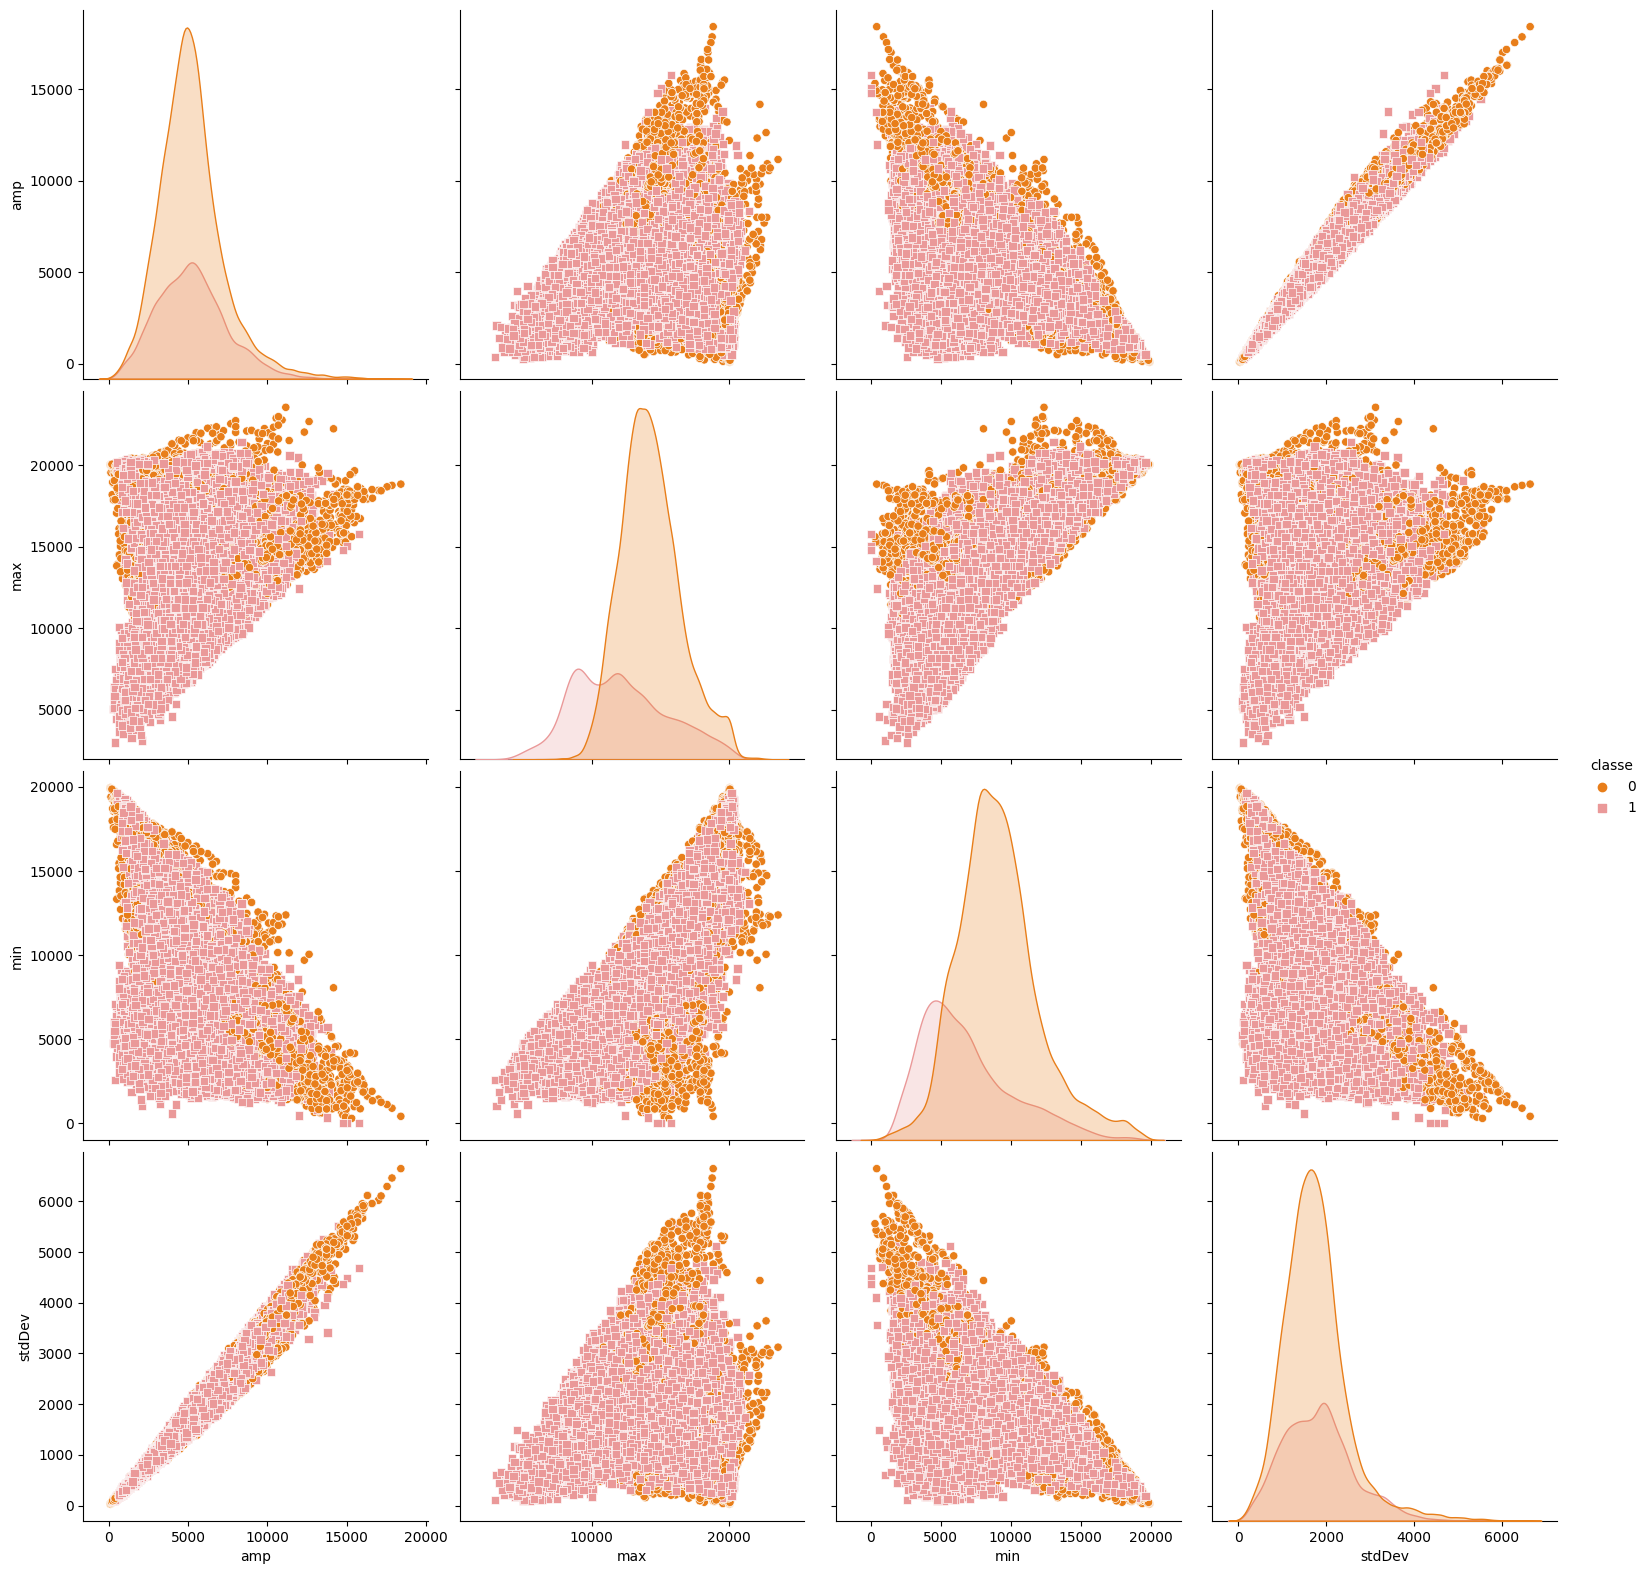

In [16]:
sns.pairplot(vars=['amp', 'max', 'min', 'stdDev'], data= concat_df, hue='classe', height=4, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  #

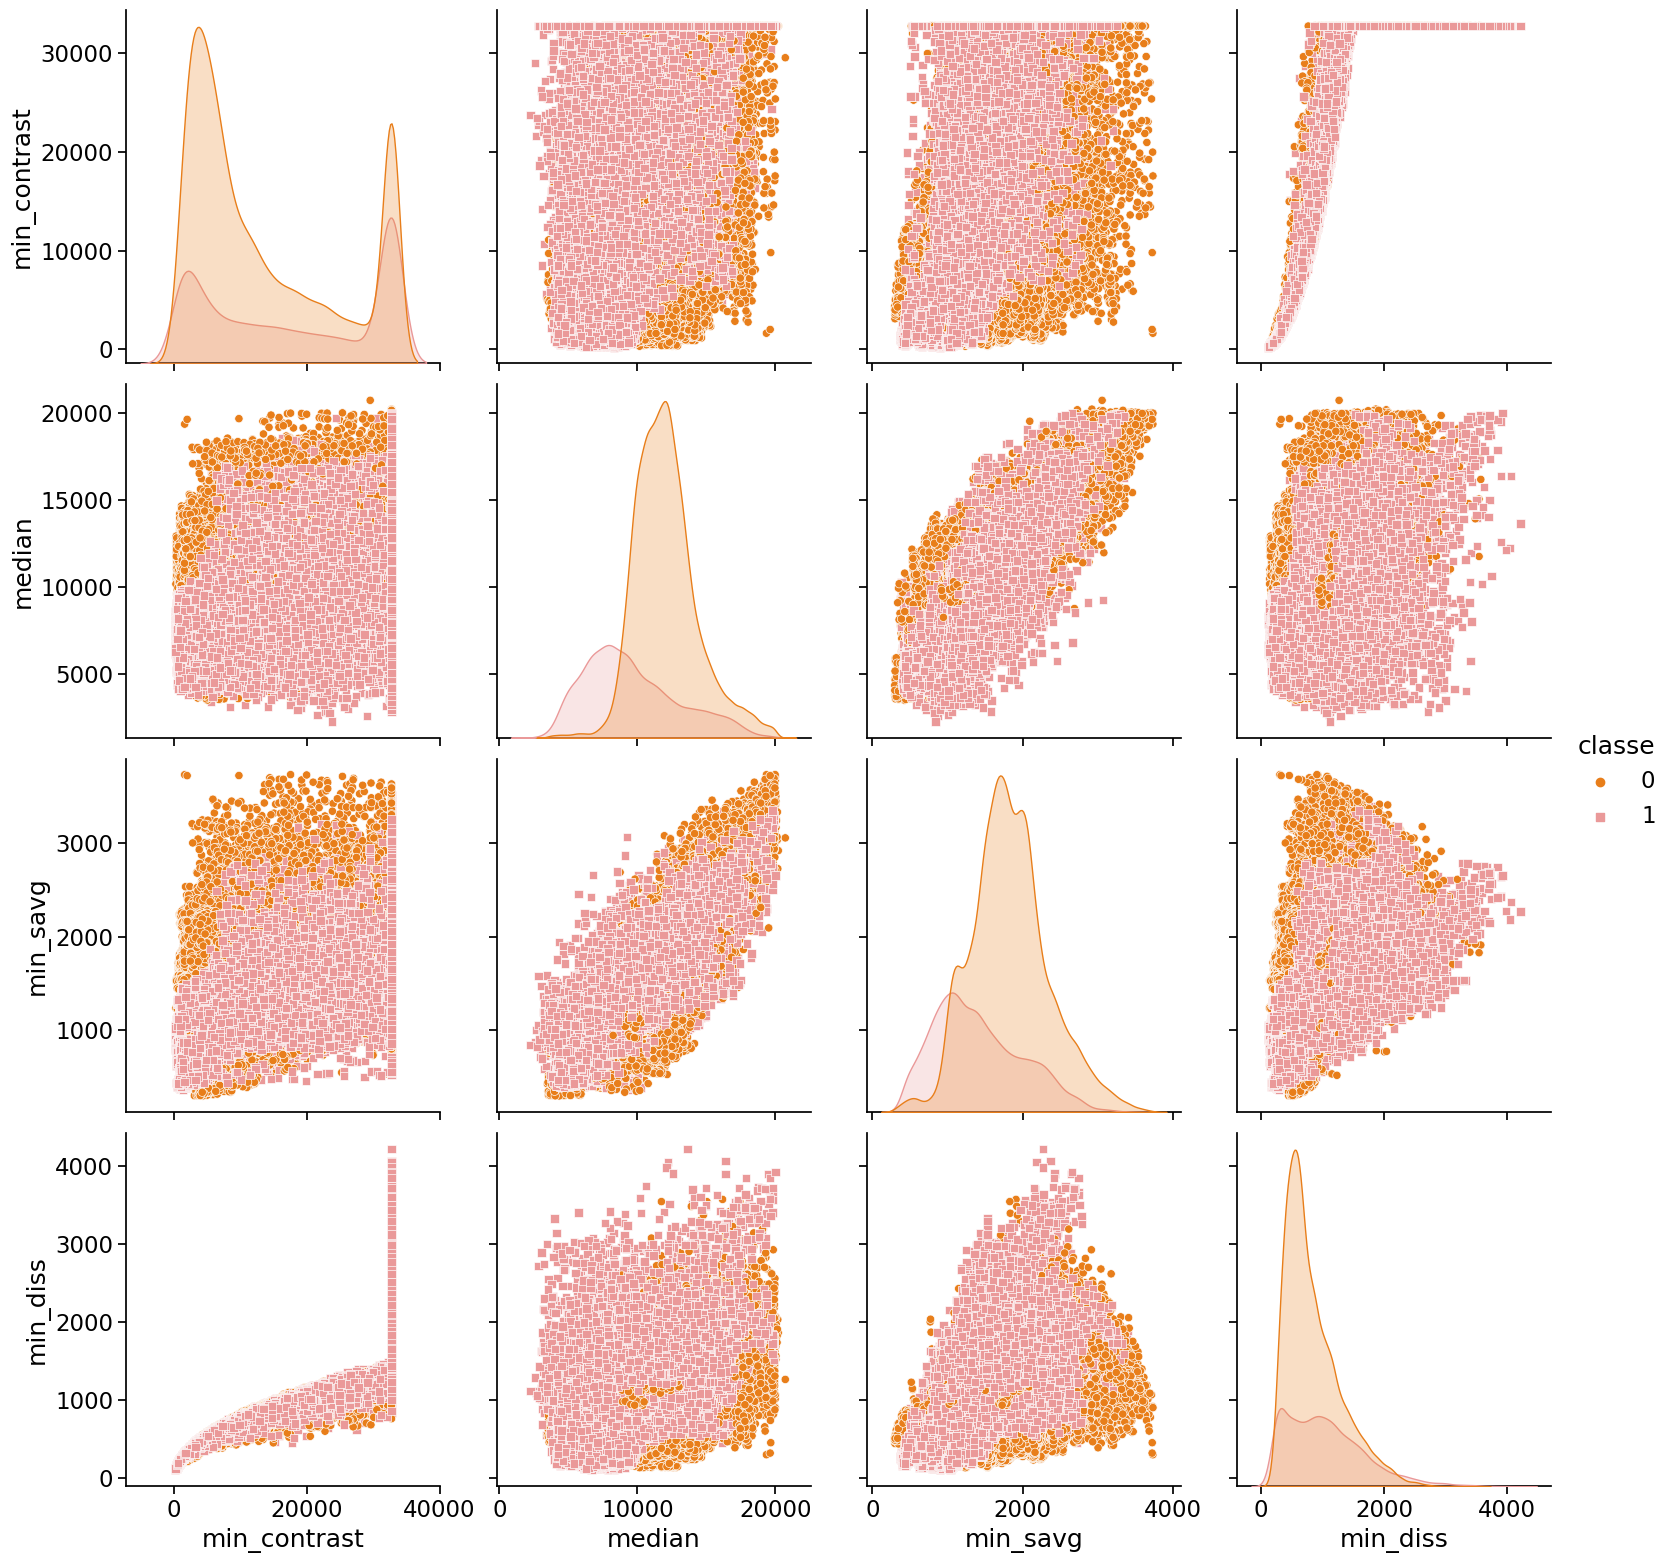

In [18]:
sns.pairplot(vars=['min_contrast', 'median', 'min_savg', 'min_diss'], data= concat_df, hue='classe', height=4, markers=["o", "s"])
sns.set_context("notebook", font_scale=1.5)  #

In [19]:
print("" ,concat_df.columns)
colunas_index = ['amp',  'max', 'mean', 'median', 'min',
                'min_contrast', 'min_diss', 'min_savg',
                'stdDev']
print("Columns to analyses ", colunas_index)

 Index(['amp', 'classe', 'max', 'mean', 'median', 'min', 'min_contrast',
       'min_diss', 'min_savg', 'stdDev'],
      dtype='object')
Columns to analyses  ['amp', 'max', 'mean', 'median', 'min', 'min_contrast', 'min_diss', 'min_savg', 'stdDev']


In [ ]:
combination = []

cont = 0
for cc, ind1 in enumerate(colunas_index):
    for ind2 in colunas_index[cc + 1 :]:
#         print(cont, ind1, ind2)
        combination.append([ind1, ind2])
        cont += 1


In [ ]:
def PlotingParFeatures(featA, featB):

    labels = ['not Soil', 'Soil']

    fig , (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 10))
    ax1.scatter(concat_df[concat_df['classe'] == 0][featA], concat_df[concat_df['classe'] == 0][featB], marker='^', color='#006400', label='not Soil' )
    ax1.scatter(concat_df[concat_df['classe'] == 1][featA], concat_df[concat_df['classe'] == 1][featB], marker='*', color='#E87E1A', label='Soil' )

    ax2.scatter(concat_df[concat_df['classe'] == 1][featA], concat_df[concat_df['classe'] == 1][featB], marker='*', color='#E87E1A', label='soil' )
    # ax2.scatter(ndf[ndf['class'] == 2][featA], ndf[ndf['class'] == 2][featB], marker='*', color='r', label='Water_FalseP' )

    labelx = 'frequence ' + featA
    labely = 'frequence ' + featB
    title = 'Plot scatter probabilits ' + featA + ' vs ' + featB
    ax1.set_xlabel(labelx, fontsize=14)
    ax2.set_xlabel(labelx, fontsize=14)
    ax1.set_ylabel(labely, fontsize=14)
    ax1.set_title(title, fontsize=18)
    handles, labels = ax1.get_legend_handles_labels()
    ax1.legend(labels, loc=7 , bbox_to_anchor=(0.95,0.9))
    ax2.legend(labels[1], loc=7 , bbox_to_anchor=(0.95,0.9))
    texteSav = 'graficos/plot_' + featA + '_' + featB + '_Caatinga.png'
    plt.show()


In [ ]:
len(combination)

36

In [ ]:
for ii in range(10):
    numsort = randint(0, len(combination) - 1)
    parnumb = combination[numsort]
    PlotingParFeatures(parnumb[0] , parnumb[1])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def ploting_violin_rois_Class_index (featA):

    fig , axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(18, 9))
    # Set your custom color palette
    sns.set_palette(sns.color_palette(colors))
    ladoA = sns.boxplot(x="classe", y=featA, data=concat_df, ax= axes[0])  # , palette="Set3"
    ladoB = sns.violinplot(x="classe", y=featA, data=concat_df,ax= axes[1], split=True, linestyle=':',  #  palette="Set3",
                        scale="count", inner="quartile")
    # sns.catplot(x="label", y="shade", data=ndf, palette="Set3")  # ax= axes[2],
    ladoA.set_xlabel("CLASS",fontsize=16)
    ladoA.set_ylabel(featA,fontsize=16)
    ladoB.set_xlabel("CLASS",fontsize=16)
    ladoB.set_ylabel(featA,fontsize=16)
    ladoA.set_xticklabels(dict_class.values(), rotation=45)
    ladoB.set_xticklabels(dict_class.values(), rotation=45)

    plt.suptitle('Plot ROIs class in {}'.format(featA), fontsize=24)
    plt.show()


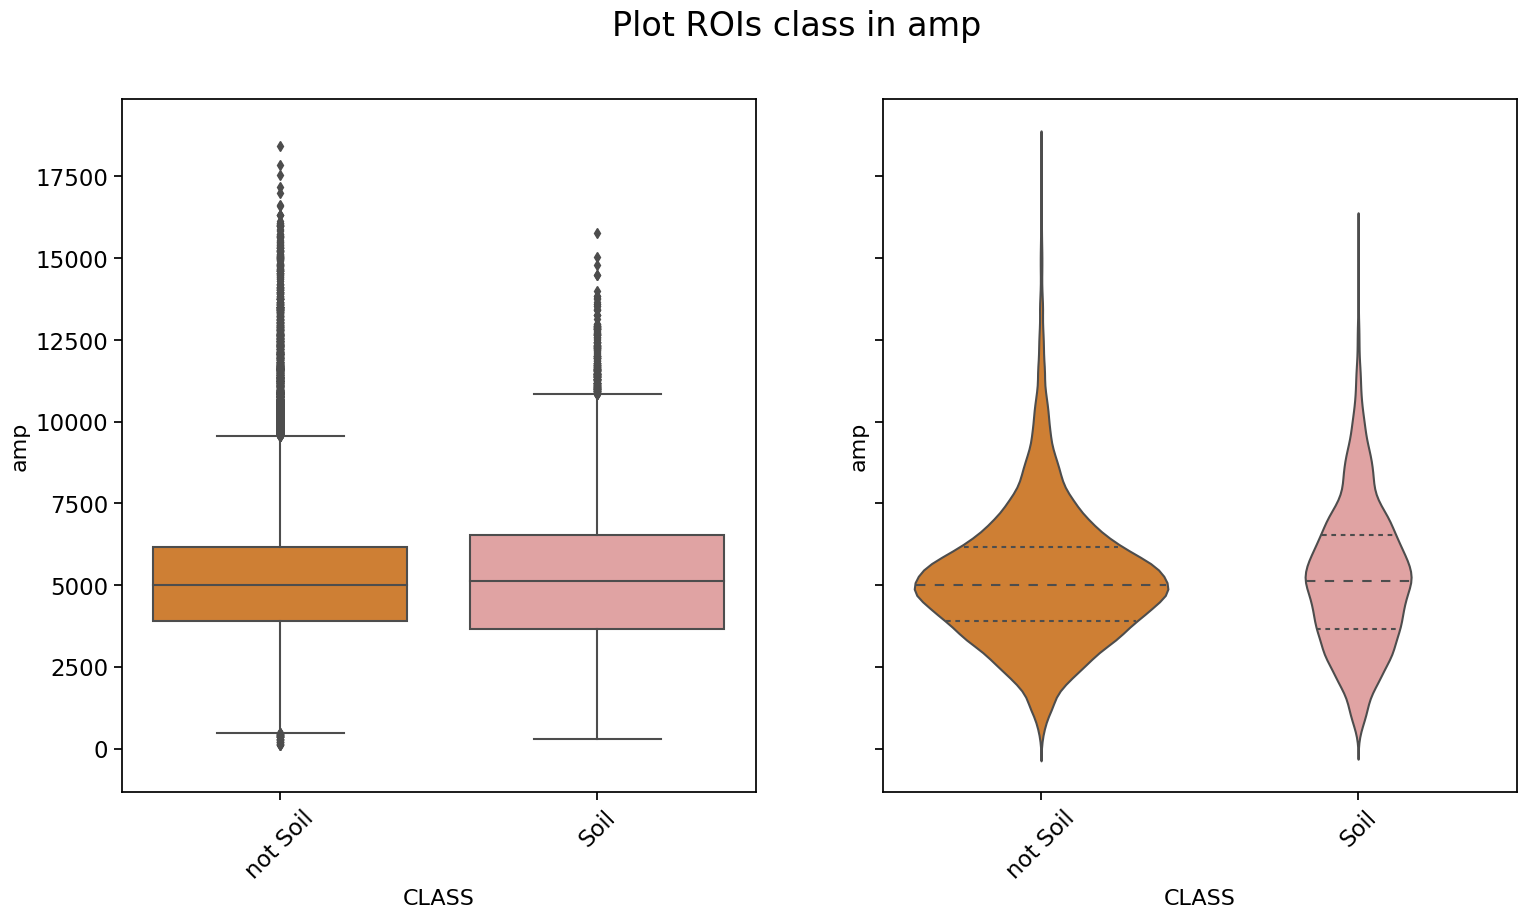

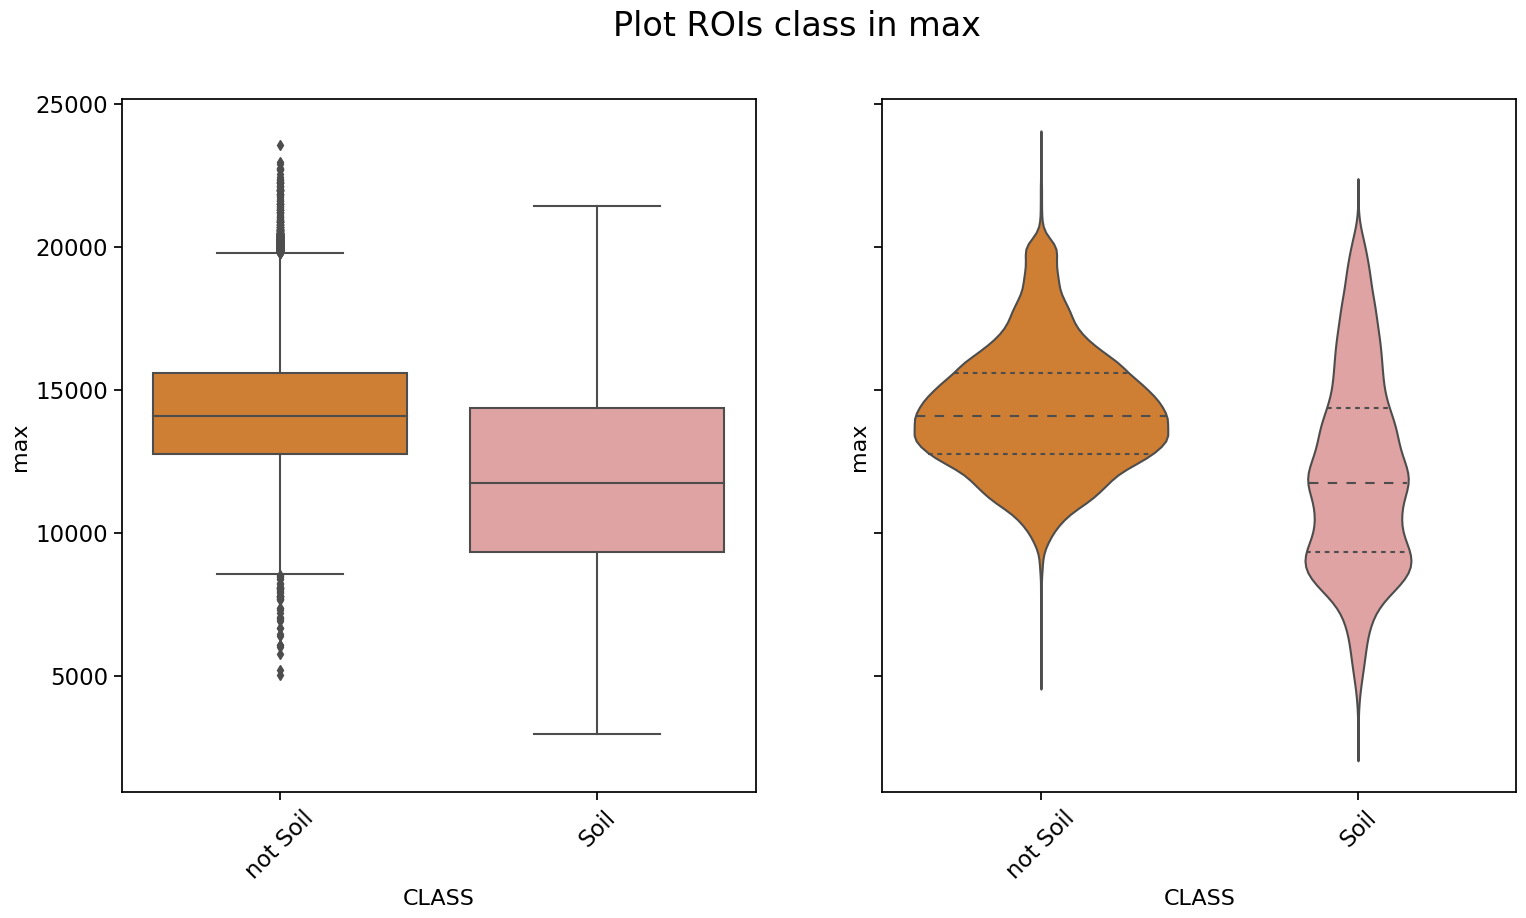

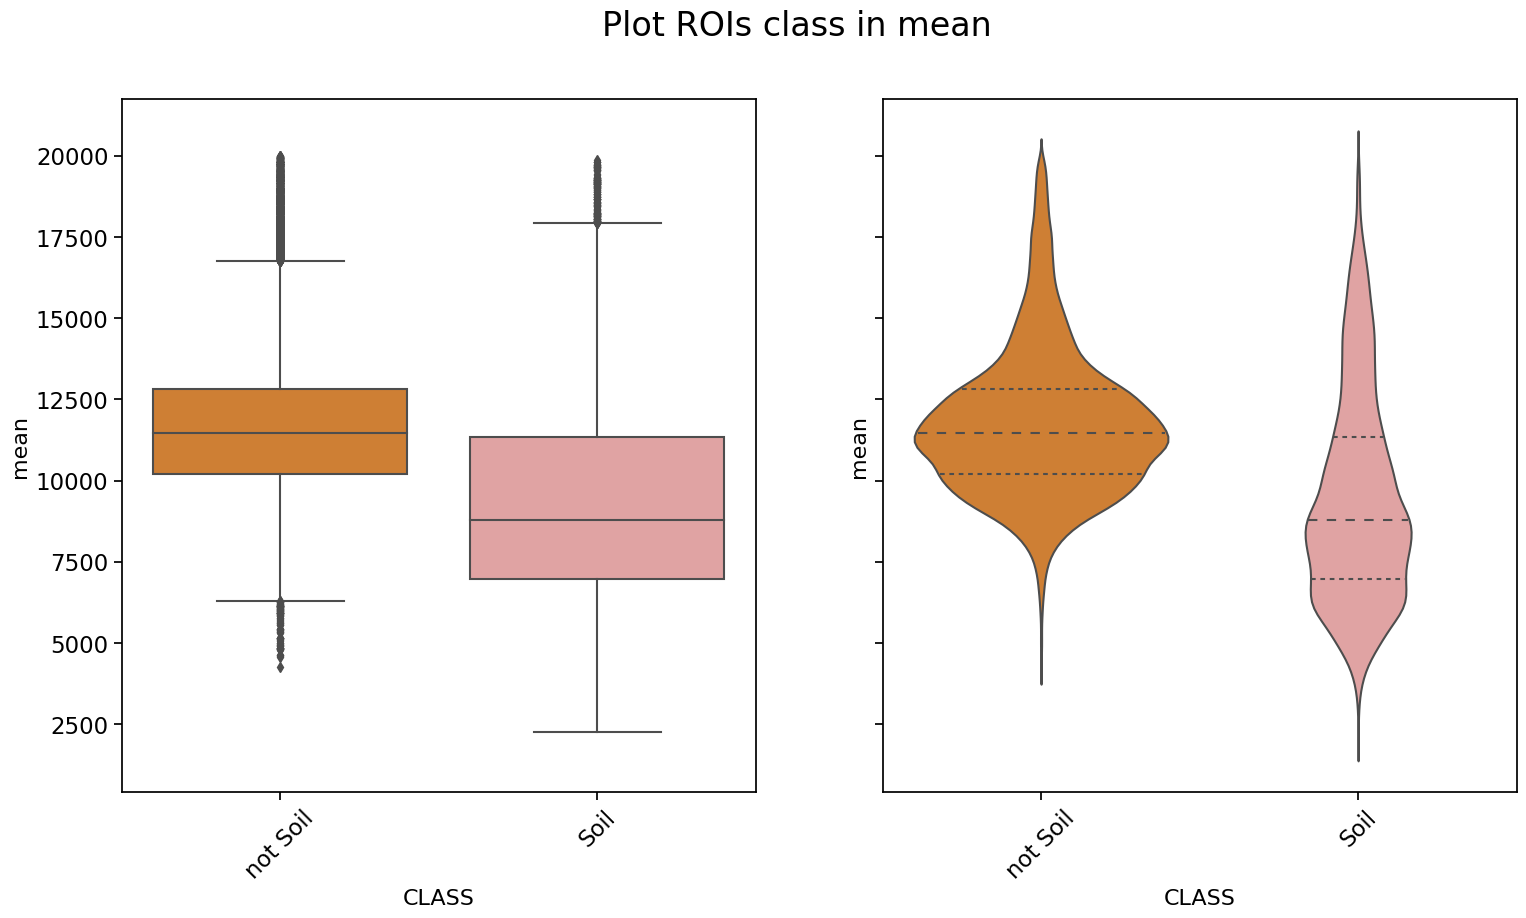

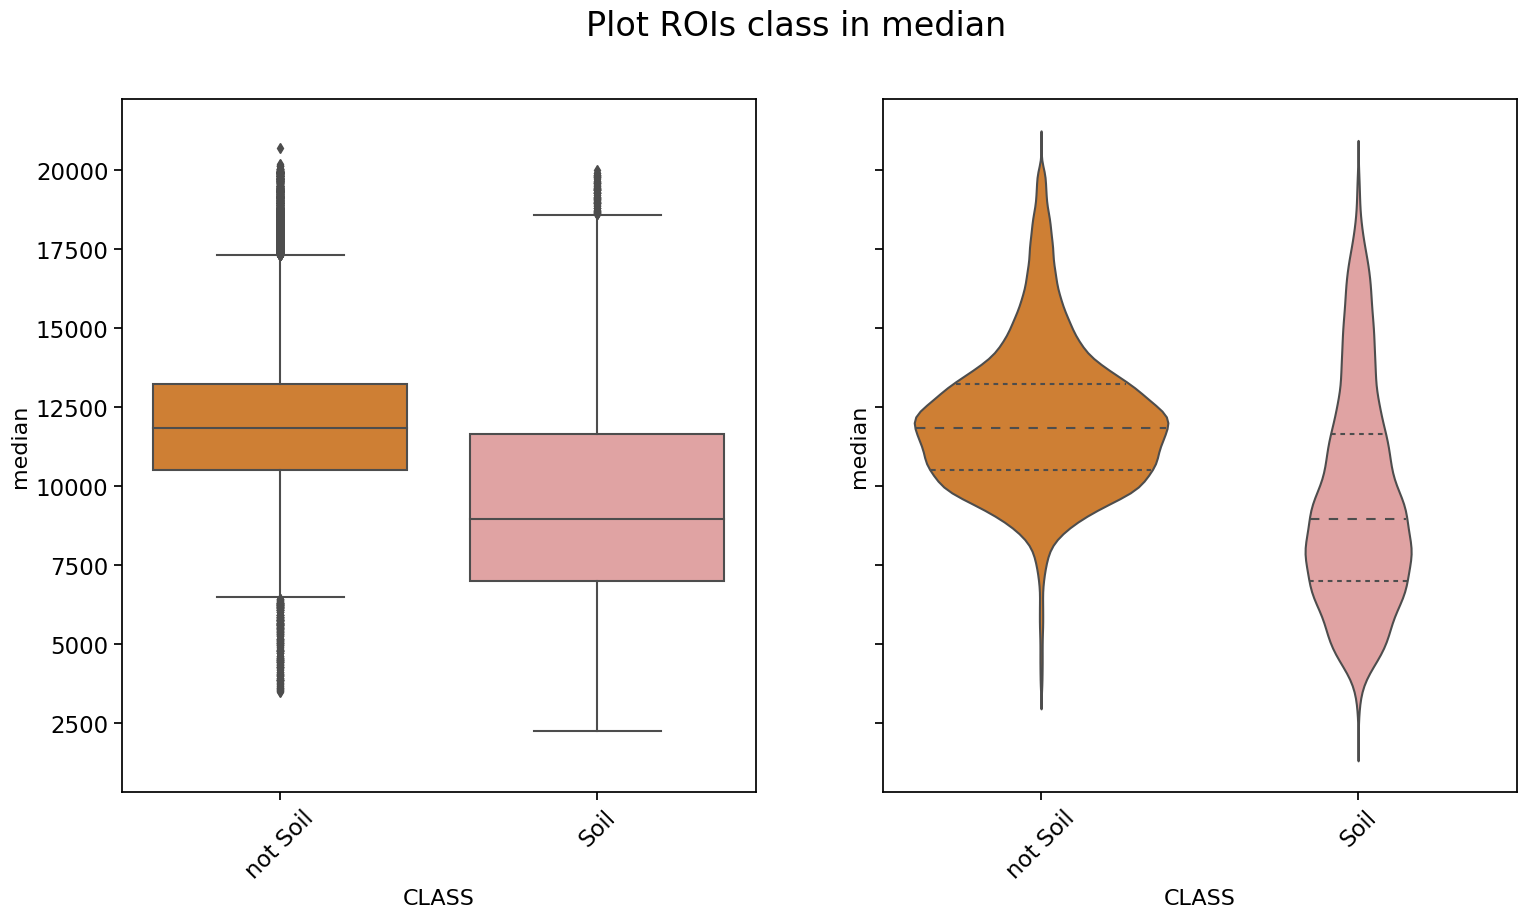

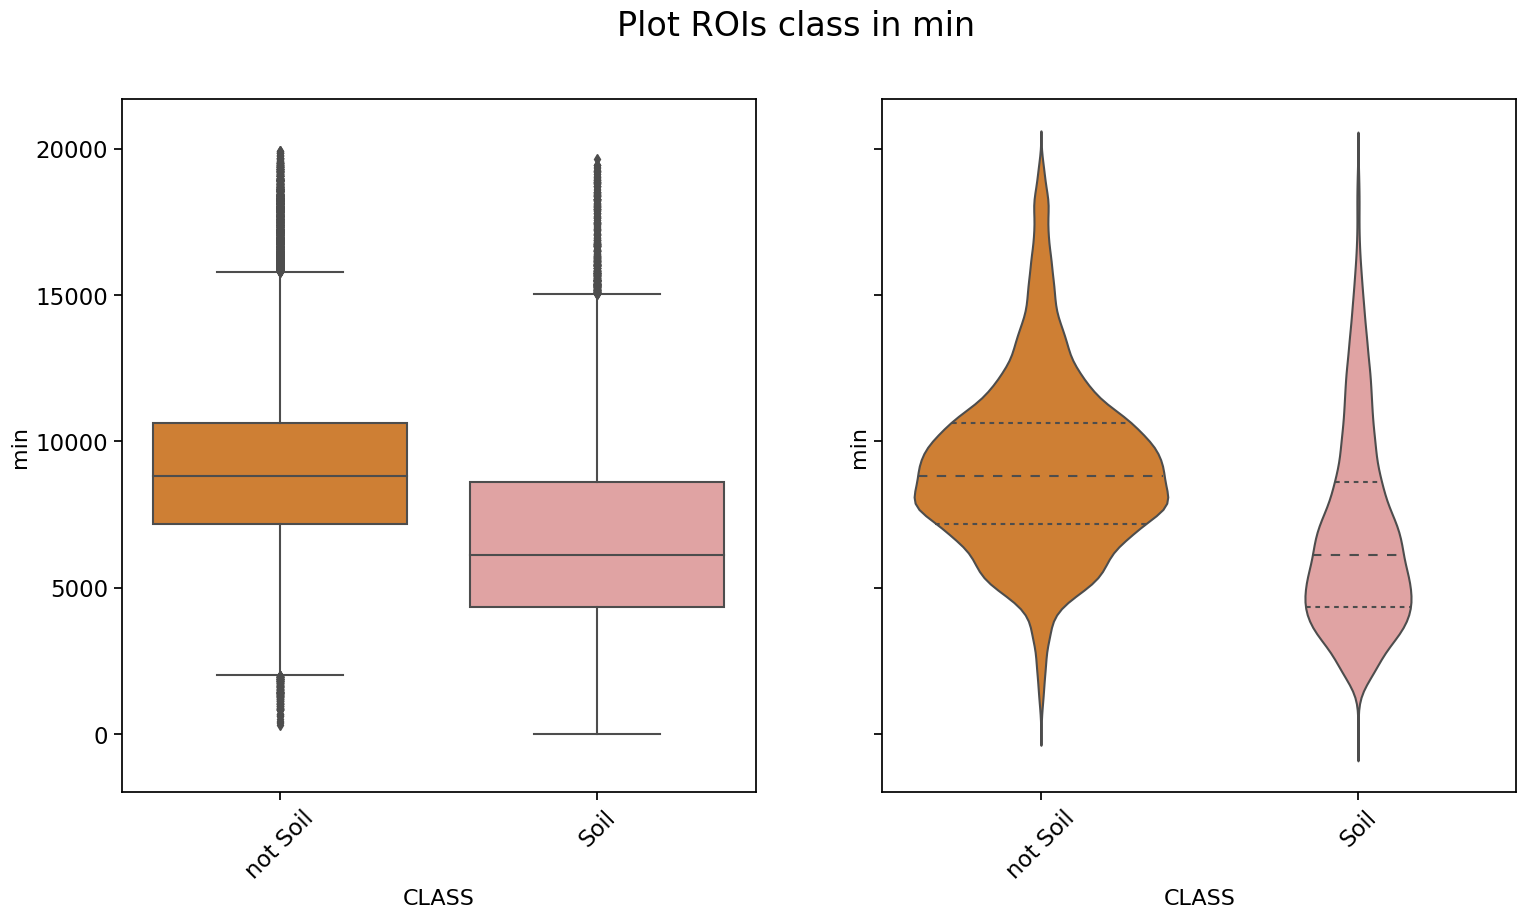

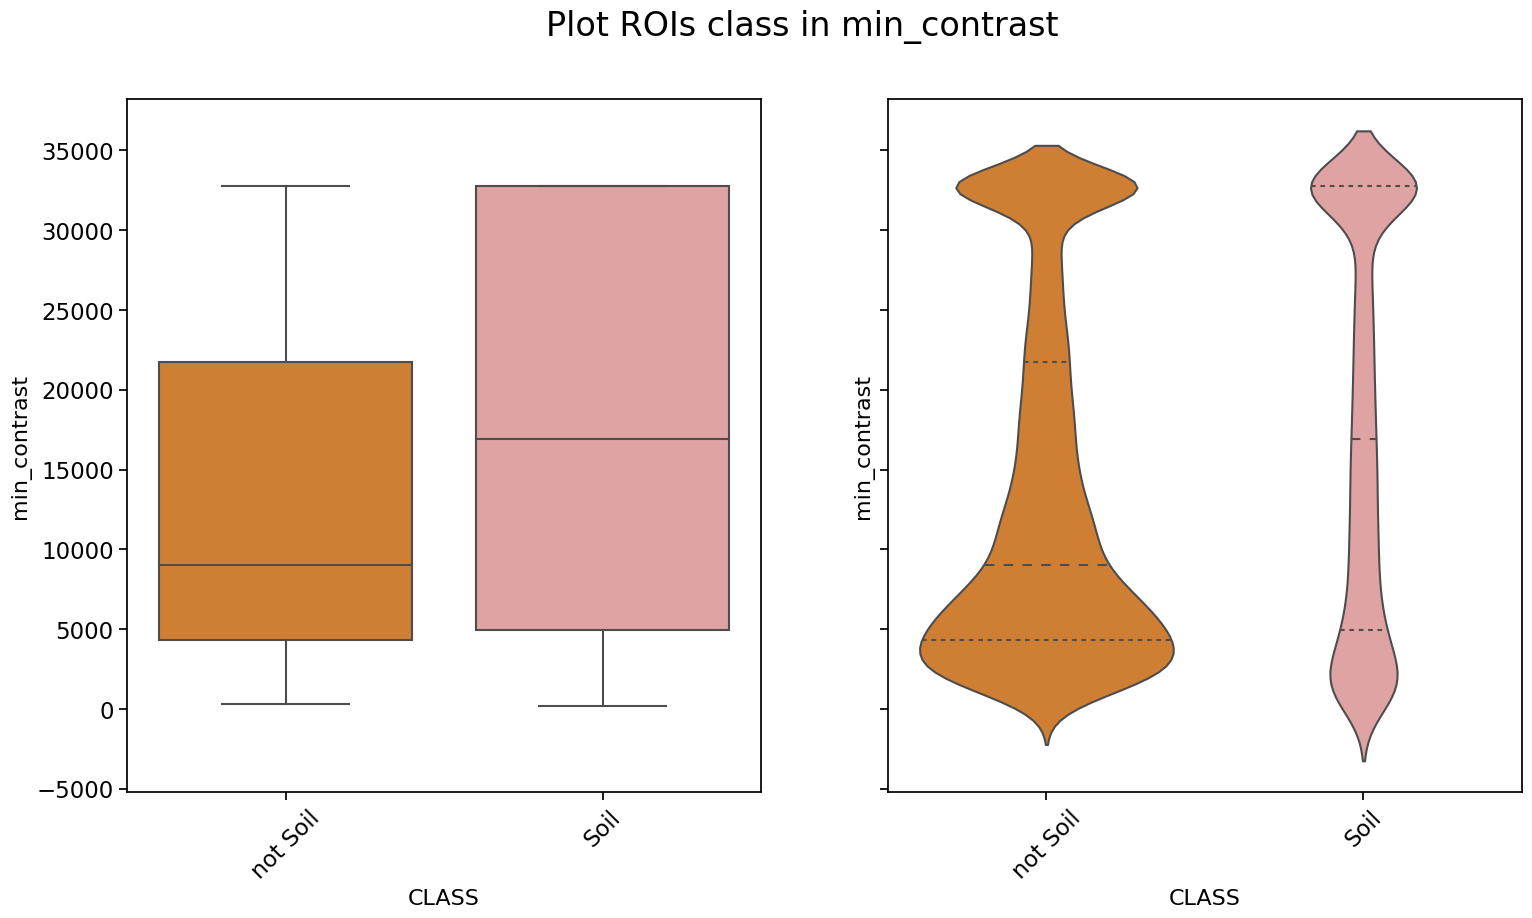

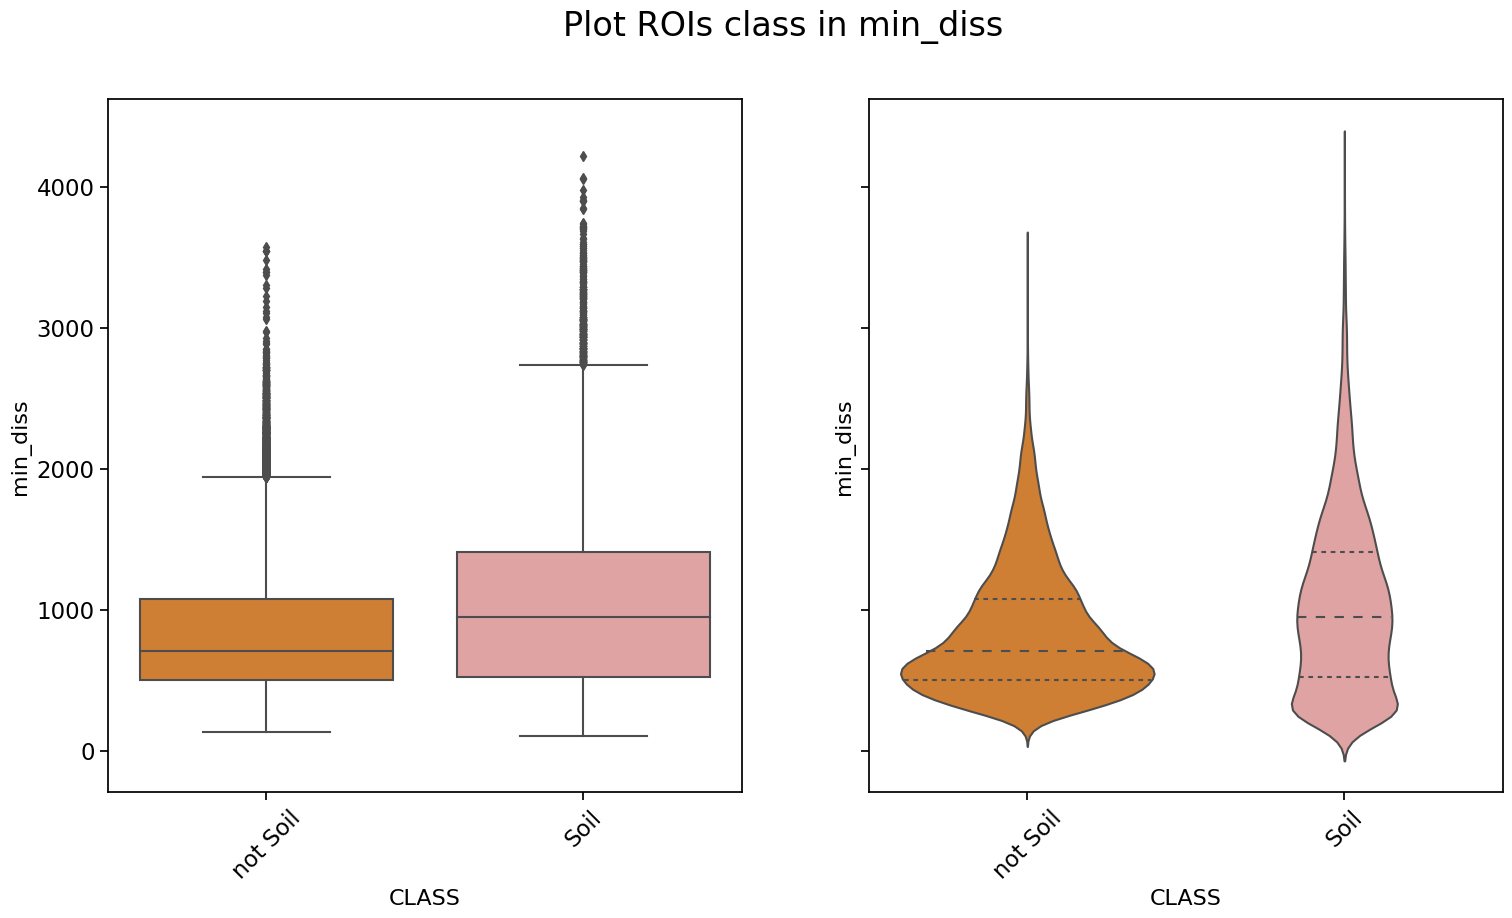

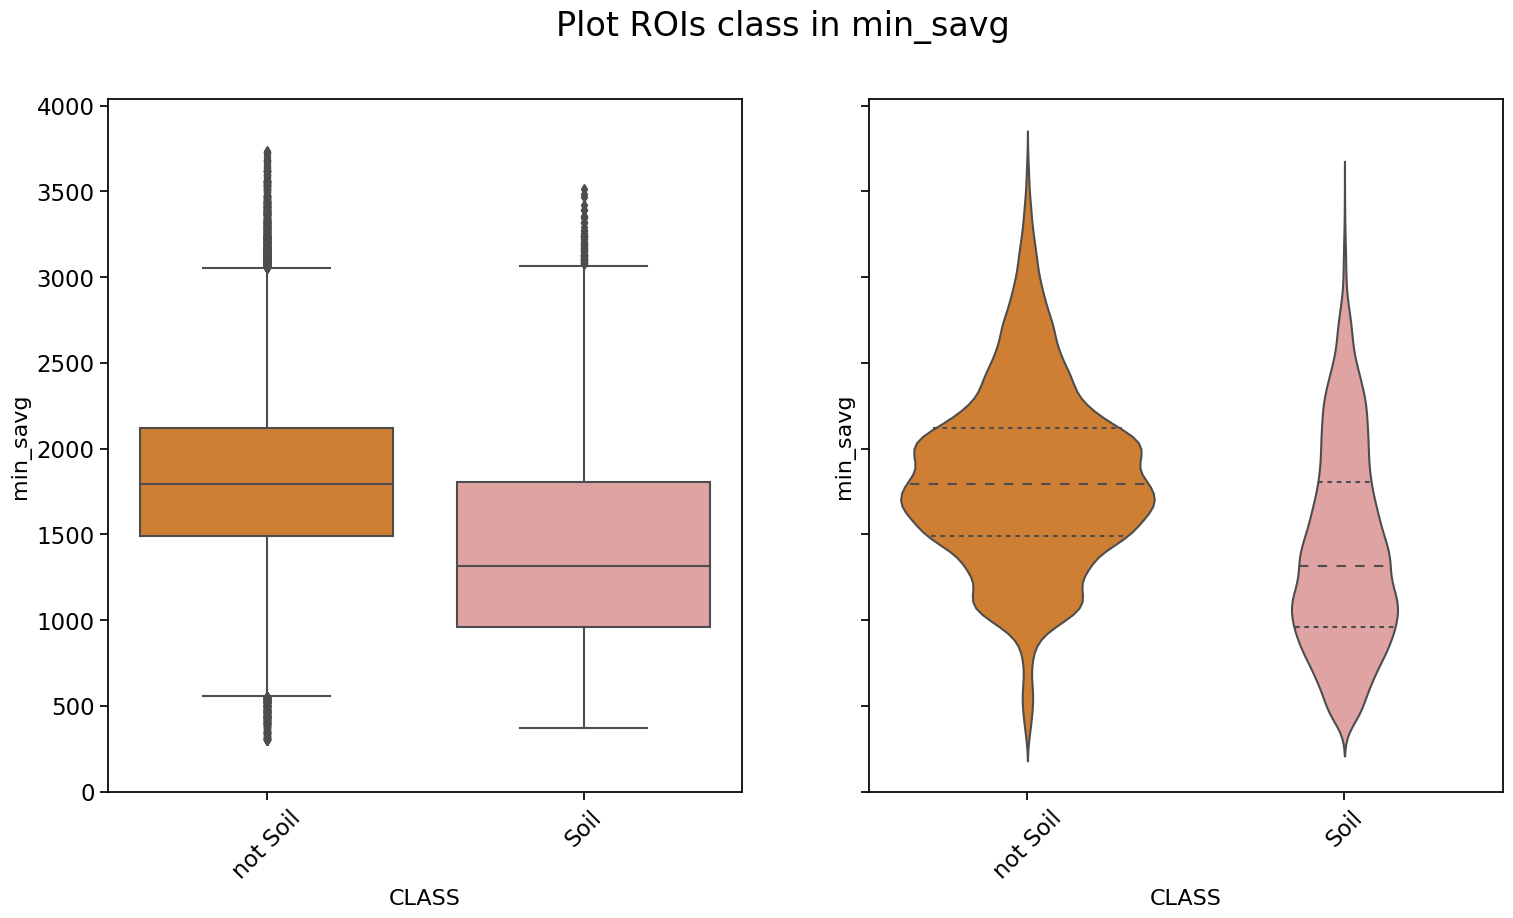

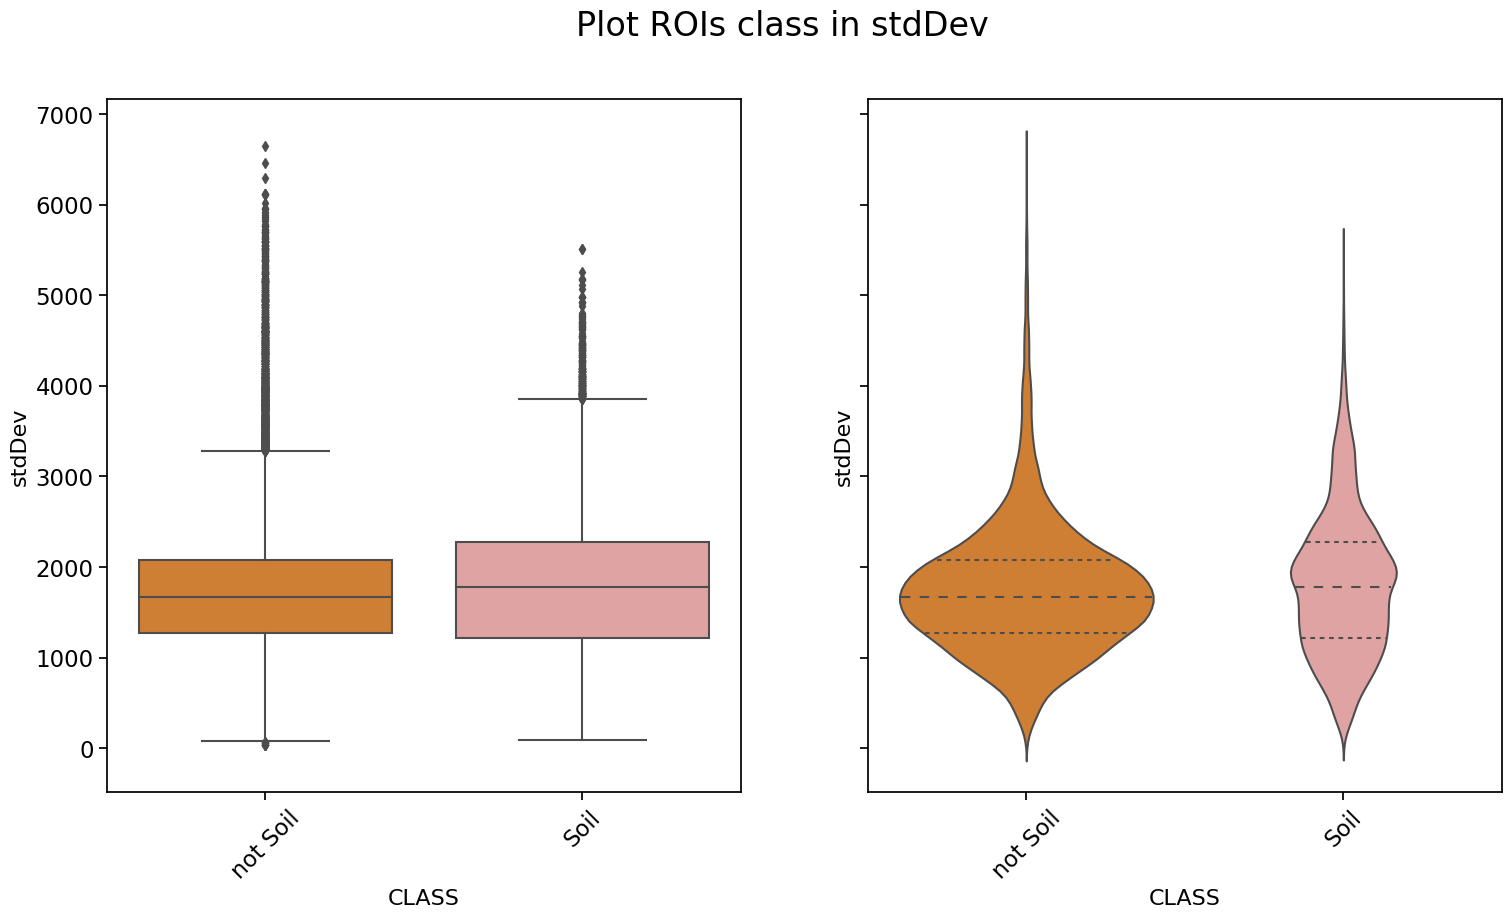

In [ ]:
for col in colunas_index:
    # numsort = randint(0, len(colunas_index) - 1)
    ploting_violin_rois_Class_index(col)

In [ ]:
concat_df[concat_df['classe'] == 1]['min'].describe()

count    19684.000000
mean      6835.402865
std       3331.948495
min          0.000000
25%       4351.000000
50%       6103.000000
75%       8619.000000
max      19647.000000
Name: min, dtype: float64

# analizando a as amostras via usando o SCORE  de Random Forest

In [ ]:
colDif = [x for x in concat_df.columns]
colDif.remove('classe')

print(colDif)
iterador = 0

['amp', 'max', 'mean', 'median', 'min', 'min_contrast', 'min_diss', 'min_savg', 'stdDev']


## analises de clusters

In [ ]:
concat_df = concat_df.dropna()
concat_df.columns

Index(['amp', 'classe', 'max', 'mean', 'median', 'min', 'min_contrast',
       'min_diss', 'min_savg', 'stdDev'],
      dtype='object')

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import KMeans

In [ ]:
def unique_values(mlist):
    newlist = []
    for ll in mlist:
        if ll not in newlist:
            newlist.append(ll)

    return newlist

# analises de classificação

In [ ]:
columnaTraining = colDif
X_train, X_test, y_train, y_test = train_test_split(concat_df[columnaTraining], concat_df['classe'],
                                                   test_size=0.30)
X_train

,amp,max,mean,median,min,min_contrast,min_diss,min_savg,stdDev
14219,6318,13238,9513.692308,9603.0,6920,18753,1062,1403,1867.497107
24684,4664,9537,7124.823529,7270.0,4873,1641,312,990,1582.204242
2705,6038,15678,13034.461538,14209.0,9640,31705,1381,2228,2101.453878
37201,5844,11616,9336.588235,9918.0,5772,3353,448,1175,2049.717457
49793,6038,12775,10277.882353,11271.0,6737,32767,2076,1417,2273.314214
...,...,...,...,...,...,...,...,...,...
16971,3261,19340,17345.000000,17089.0,16079,32767,2039,2674,1098.226753
13585,5063,19347,17119.846154,17740.0,14284,13601,901,2707,1818.509992
55838,4001,11418,9423.444444,8937.0,7417,3816,461,1492,1449.341698
36208,5320,14545,11804.411765,12288.0,9225,9885,769,1921,1635.908348


In [ ]:
print("tamano do ROI para training", X_train.shape)
print("tamano do ROI para test", X_test.shape)
print("tamano do Salida para training", y_train.shape)
print("tamano do Salida para test", y_test.shape)

tamano do ROI para training (46745, 9)
tamano do ROI para test (20034, 9)
tamano do Salida para training (46745,)
tamano do Salida para test (20034,)


In [ ]:
countCC1 = 0
for yy in y_test:
  if yy == 1:
    countCC1 += 1

print("number class 1 = ", countCC1)

number class 1 =  5926


In [ ]:
if iterador > 0:
    columnaTraining =  [  'mean', 'median', 'min', 'min_contrast',
                'min_diss', 'min_savg', 'stdDev', 'max', 'amp',
                ]  #
else:
    iterador += 1

In [ ]:
# columnaTraining
classificador = 'GTB'# 'RF' #

In [ ]:
if classificador == 'RF':
    clf = RandomForestClassifier(n_estimators=35, max_depth=2, min_samples_split=9, random_state=0)
    clf.fit(X_train[columnaTraining], y_train)
    y_pred = clf.predict(X_test[columnaTraining])
else:
    clf = GradientBoostingClassifier(n_estimators=35, learning_rate=1.5, max_depth=2, random_state=10)
    clf.fit(X_train[columnaTraining], y_train)
    y_pred = clf.predict(X_test[columnaTraining])


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[13686,   422],
       [ 3128,  2798]])

In [ ]:
print(matrix[0,1])
print(matrix[1,0])

422
3128


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

Confusion matrix, without normalization
[[13105  1003]
 [ 2031  3895]]


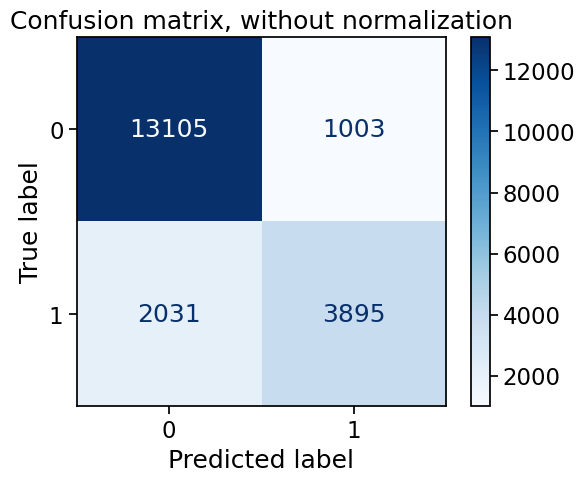

In [ ]:
# Plot non-normalized confusion matrix
title = "Confusion matrix, without normalization"
normalize = None

disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test[columnaTraining],
    y_test,
    # display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=normalize,
)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

Normalized confusion matrix
[[0.92890559 0.07109441]
 [0.34272697 0.65727303]]


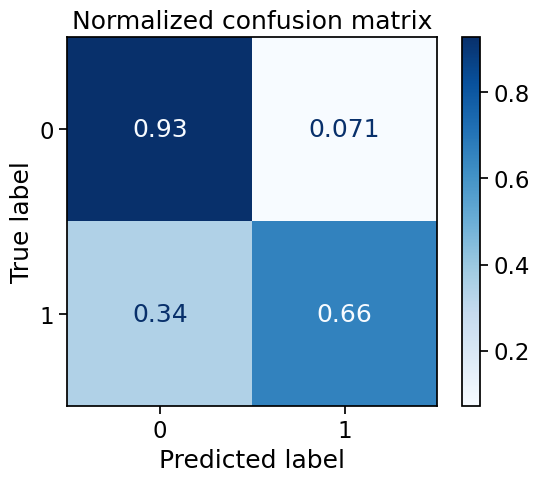

In [ ]:
title = "Normalized confusion matrix"
normalize = "true"
disp = ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test[columnaTraining],
    y_test,
    # display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=normalize,
)
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()

In [ ]:
varlorAcc = accuracy_score(y_test, y_pred)
print("Acurcia geral ====>  {}".format(varlorAcc))

Acurcia geral ====>  0.8651676138703567


In [ ]:
#Criando lista de lista com cada lista contendo a lista de features usadas por cada arvore
feats = []
for j in range(len(clf.estimators_)):
  feat = list(set([columnaTraining[i] for i in list(clf.feature_importances_)]))
  feat.sort()
  feats.append(feat)

TypeError: ignored

In [ ]:
print(feat)

['amp', 'max', 'median', 'min', 'min_contrast', 'min_savg']


Text(0.5, 1.0, 'Importância de cada feature')

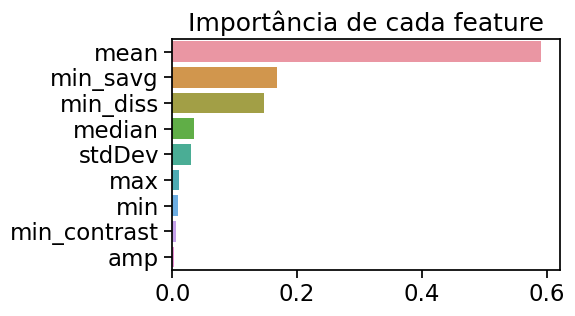

In [ ]:
importances = pd.Series(data=clf.feature_importances_, index=columnaTraining)
importances = importances[importances[columnaTraining] > 0].sort_values(ascending = False)
plt.figure(figsize=(5,3))
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

In [ ]:
ls_name_imp = []
for name, _imp in importances.iteritems():
    ls_name_imp.append(name)
index_d = 5
for index in range(0, len(ls_name_imp), 5):
    text = ''
    for jj in ls_name_imp[index : index_d]:
        text += '"' + jj + '",'
    print(text)
    index_d += 5


"median","min","min_savg","mean","max",
"min_diss","min_contrast","amp","stdDev",


<ipython-input-75-2340aad95739>:2: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

